# <u>Assignment 1 in Deep Learning Course</u>

In this assignment we chose to use [CIFAR 100 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

## <u>Table of contents</u>

* <a href="#Q1" title="Q1">Q1 - Questions and answers</a>
* <a href="#Q2a" title="Q2ac">Q2a-c- Base model from scratch and improvments suggestions</a>
* <a href="#Q2d" title="Q2d">Q2d - Improved model</a>
* <a href="#Q3a" title="Q3ac">Q3a-c - Transfer learning - fine tuning</a>
* <a href="#Q3d" title="Q3d">Q3d - Transfer learning - Feature extraction and comparisons</a>


**Every section from Q2-Q3 has conclusions in the end.**

In [14]:
from keras.datasets import cifar100
import pandas as pd
import numpy as np
import operator
from u_functions import showplot
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [11]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

<p id="Q1"></p>

## <u> Q1</u> 

### a.What is the size of the data ?

In [4]:
len(x_train)

50000

In [11]:
len(x_test)

10000

`There are 50000 samples in train and 10000 in test.`

### b.What data does each sample contain? (dimensions, channels, how many classes ) ? 

In [13]:
#sample shape 
dim = x_train[0].shape
print(dim)
# number of classes in our data set
classes_num = len(set.union(*map(set,y_train)))
print(classes_num)


(32, 32, 3)
100


`There are 100 different classes in the dataset, the dimension for each sample is 32 x 32 and there are 3 channels (RGB)`

### Should we preprocess the data? Or is it ready for use?


`We read through the CIFAR 100 documentation and also analyzed the data.
We found that the all the data has the same dimensions and we should not preprocess it.`


## Can we use augmentation and what kind of augmentation would be valid?

We can use data augmentation. As the data is a collection of various superclass that won't be damaged by modifying it. any augmentation that won't damage it should be fine.

We will use augmentation with ImageDataGenerator that comes in keras, this will not add new data but will generate a transformed data from our train and validation set in order to create more generalization to our model.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

### c.Is the data balanced? (How many examples there are per class?)



In [5]:
classes_count_map = {}
for item in y_train:
    if item[0] in classes_count_map:
        classes_count_map[item[0]] = classes_count_map[item[0]] + 1
    else:
        classes_count_map[item[0]] = 1

In [92]:
classes_count_map = sorted(classes_count_map.items(), key=operator.itemgetter(0))
classes_count_map

[(0, 500),
 (1, 500),
 (2, 500),
 (3, 500),
 (4, 500),
 (5, 500),
 (6, 500),
 (7, 500),
 (8, 500),
 (9, 500),
 (10, 500),
 (11, 500),
 (12, 500),
 (13, 500),
 (14, 500),
 (15, 500),
 (16, 500),
 (17, 500),
 (18, 500),
 (19, 500),
 (20, 500),
 (21, 500),
 (22, 500),
 (23, 500),
 (24, 500),
 (25, 500),
 (26, 500),
 (27, 500),
 (28, 500),
 (29, 500),
 (30, 500),
 (31, 500),
 (32, 500),
 (33, 500),
 (34, 500),
 (35, 500),
 (36, 500),
 (37, 500),
 (38, 500),
 (39, 500),
 (40, 500),
 (41, 500),
 (42, 500),
 (43, 500),
 (44, 500),
 (45, 500),
 (46, 500),
 (47, 500),
 (48, 500),
 (49, 500),
 (50, 500),
 (51, 500),
 (52, 500),
 (53, 500),
 (54, 500),
 (55, 500),
 (56, 500),
 (57, 500),
 (58, 500),
 (59, 500),
 (60, 500),
 (61, 500),
 (62, 500),
 (63, 500),
 (64, 500),
 (65, 500),
 (66, 500),
 (67, 500),
 (68, 500),
 (69, 500),
 (70, 500),
 (71, 500),
 (72, 500),
 (73, 500),
 (74, 500),
 (75, 500),
 (76, 500),
 (77, 500),
 (78, 500),
 (79, 500),
 (80, 500),
 (81, 500),
 (82, 500),
 (83, 500),
 (

#####  `The data is balanced since every class has 500 samples in the trainset`

### d.Are there any benchmark results for different methods used on this data?

In this [link](https://benchmarks.ai/cifar-100) you can find the benchmark for the cifar-100 dataset.

The leading method was GPipe with 91.3% accuracy

### e.Show some samples from each label (if there are many categories try and present examples of easily separable ones vs. harder more similar categories)

In [61]:
def showimages(x_train,rows=2,cols=2):

    fig=plt.figure(figsize=(5, 5))
    for i in range(1, cols*rows +1):
        img = x_train[i-1]
        ax1 = fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show()

### Here are few examples of our dataset. the labels are in the left corner of each image

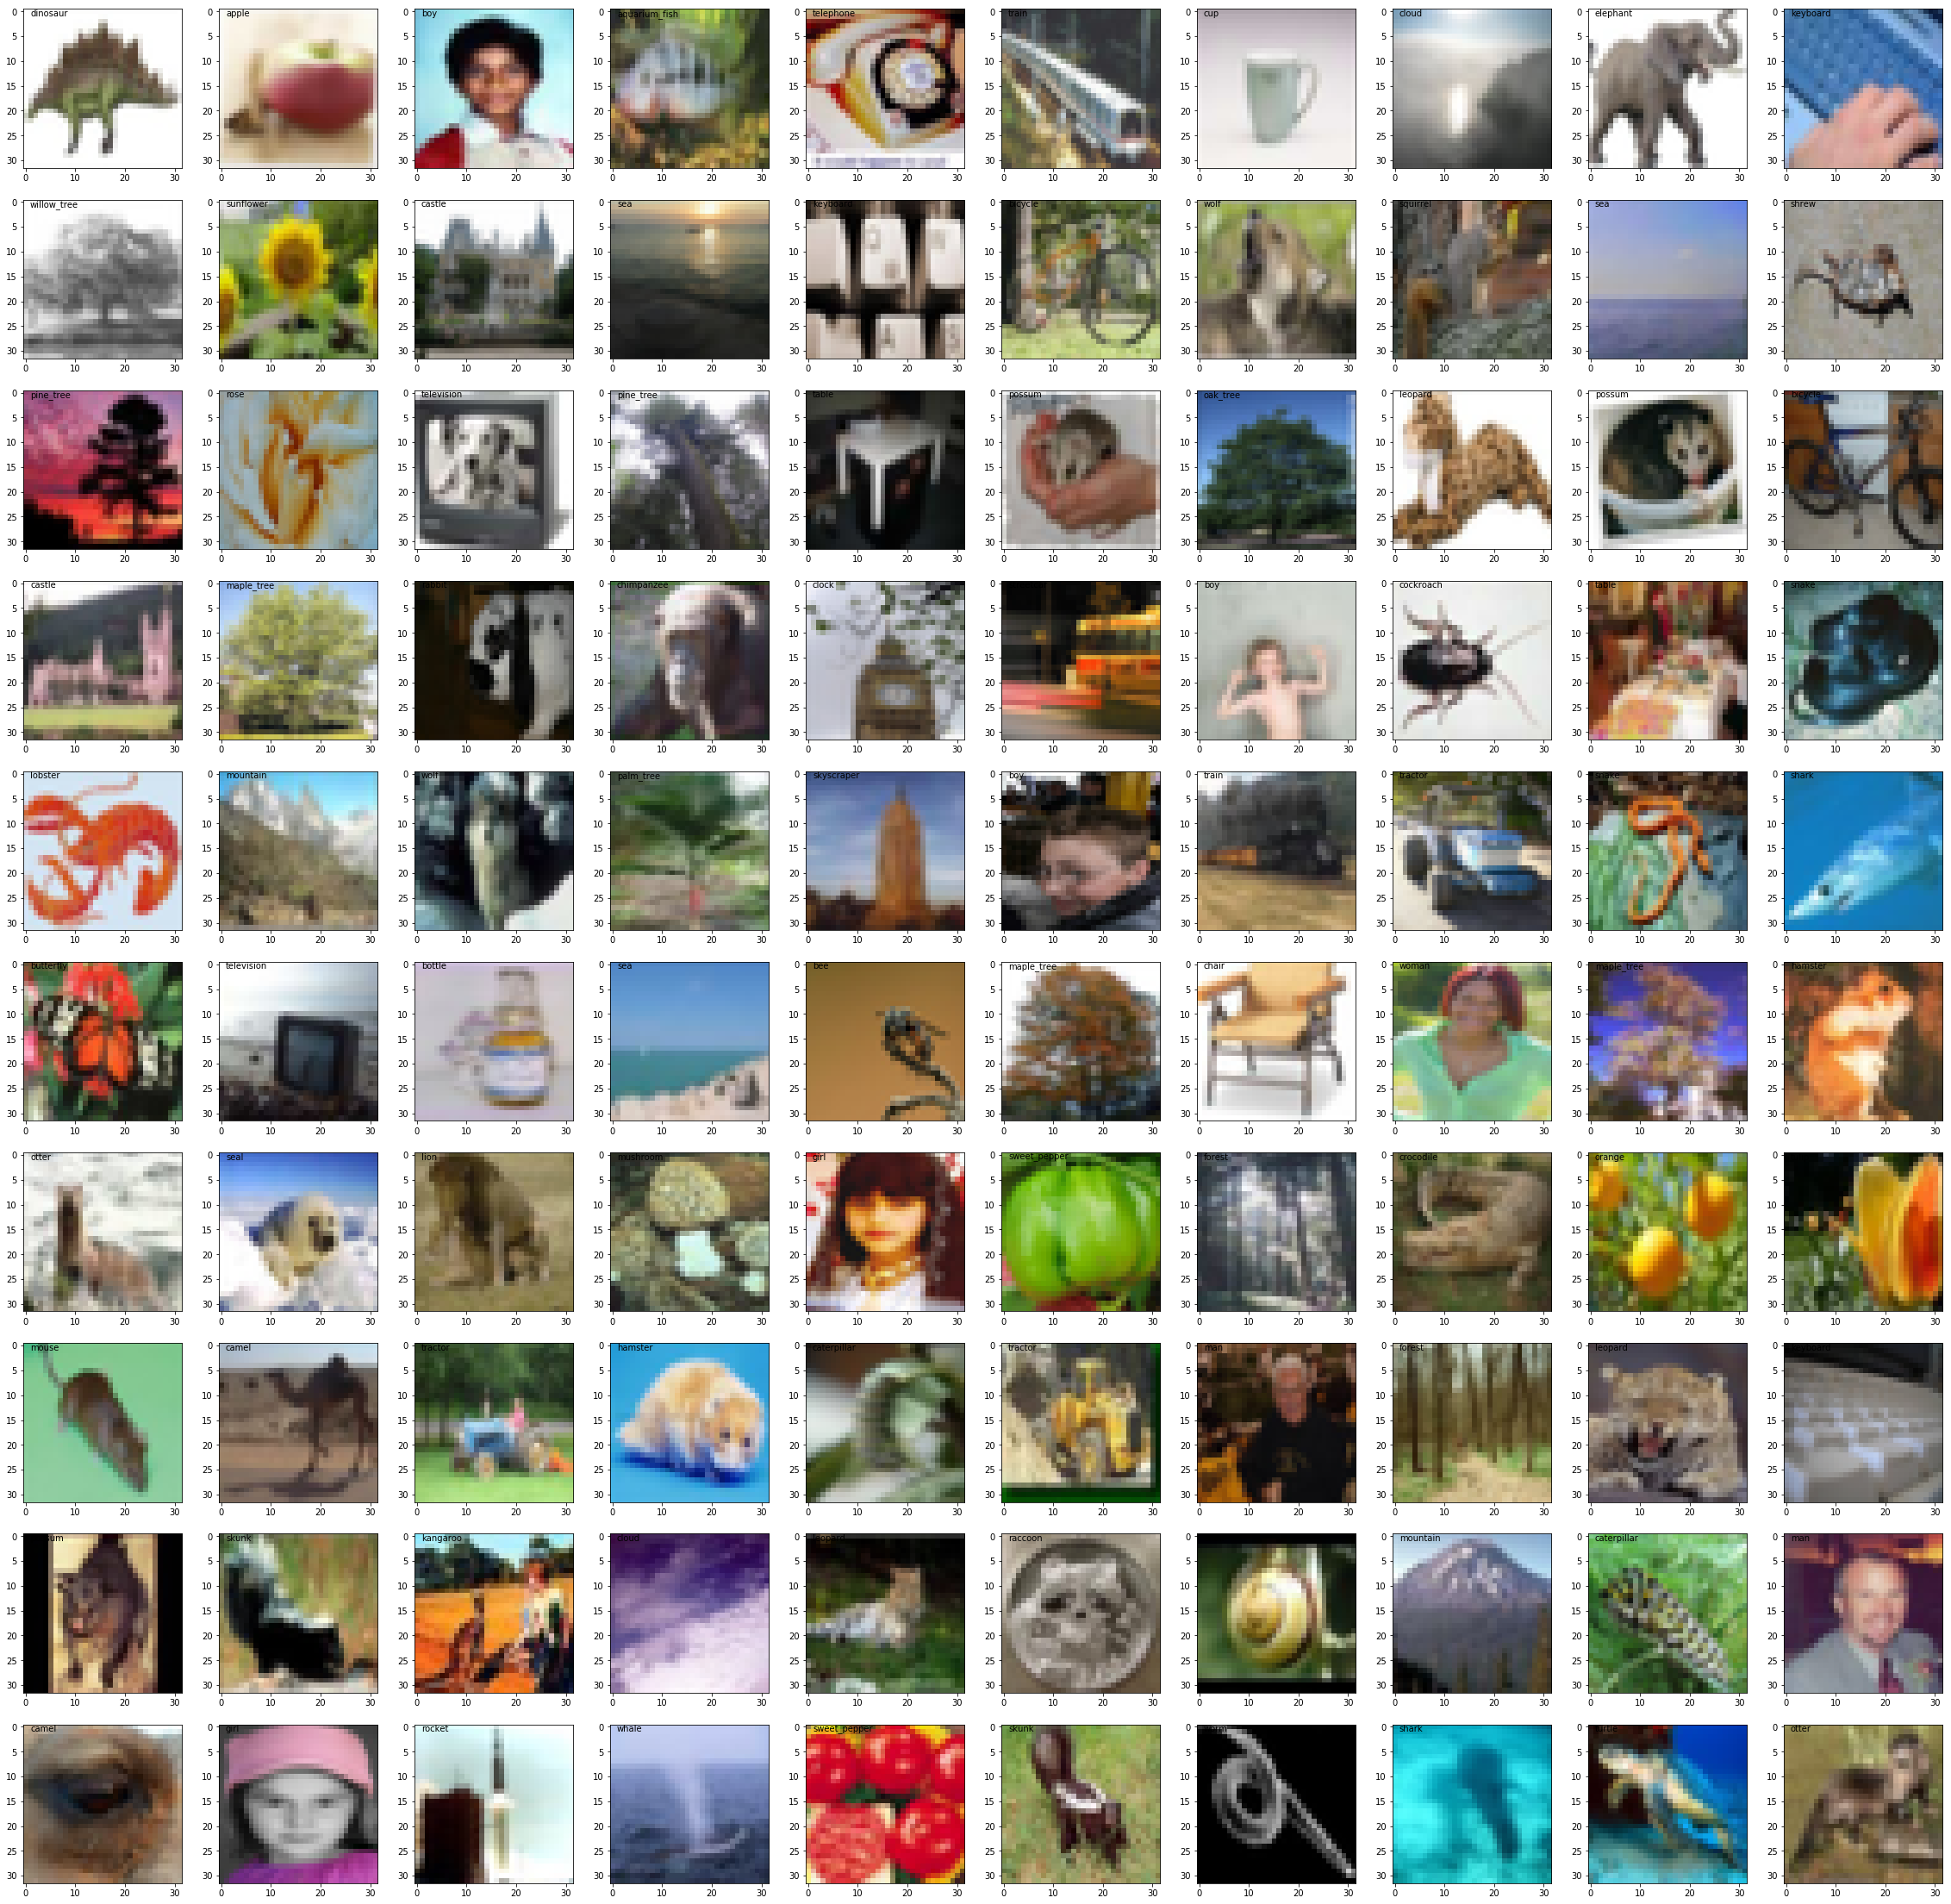

In [32]:
showplot(x_train,y_train,CIFAR100_LABELS_LIST)

### easily separable classes 

#### Here we can see Motorcycle images and bicycle. They look almsot the same but motorcycle is more robust and has more depth. We think it will be easier to classify between them

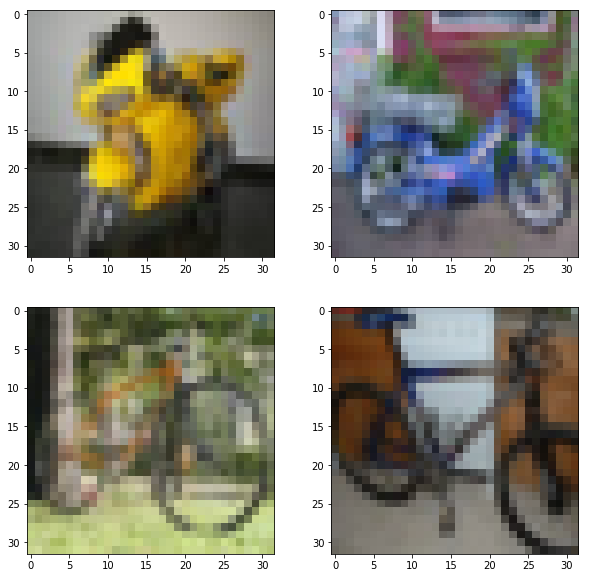

In [60]:
showimages([x_train[152],x_train[251],x_train[16],x_train[30]])

### Hard separable classes 

### Some couch and bed pictures looks the same. we think this will be hard to classify

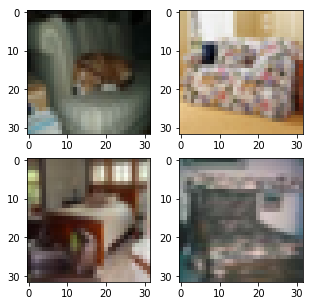

In [84]:
showimages([x_train[4208],x_train[5420],x_train[16528],x_train[464]])

<p id="Q2a"></p>

# <u>**Q2 - Build model from scratch**</u>

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.datasets import cifar100
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

%tensorflow_version 1.x

Using TensorFlow backend.


In [ ]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

num_of_classes = 100
y_train = to_categorical(y_train, num_of_classes)
y_val = to_categorical(y_val, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)
x_train = x_train.astype('float32') /255.
x_val = x_val.astype('float32') /255.
x_test = x_test.astype('float32') /255.
_, dim1, dim2 , channels = x_train.shape

169009152/169001437 [==============================] - 2s 0us/step


## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

## Building the model

In [ ]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(input_shape=(dim1,dim2,channels),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(units=100, activation="softmax"))

In [ ]:
opt = Adam(lr=0.001)
from keras import optimizers
# opt = optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

## Showing the Model's Layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)       

## Training the model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("cifar_100_base.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                steps_per_epoch=len(x_train) / 32, epochs=30, callbacks=[checkpoint,early] ,shuffle=True, verbose=1,validation_data=(x_val,y_val),validation_steps=(len(x_val)/32))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
1250/1250 [==============================] - 81s 65ms/step - loss: 3.8196 - acc: 0.1168 - val_loss: 4.2051 - val_acc: 0.1128

Epoch 00001: val_acc improved from -inf to 0.11280, saving model to cifar_100_base.h5
Epoch 2/30
1250/1250 [==============================] - 76s 61ms/step - loss: 3.2365 - acc: 0.2129 - val_loss: 2.8156 - val_acc: 0.2926

Epoch 00002: val_acc improved from 0.11280 to 0.29260, saving model to cifar_100_base.h5
Epoch 3/30
1250/1250 [==============================] - 76s 61ms/step - loss: 2.9206 - acc: 0.2736 - val_loss: 2.8444 - val_acc: 0.3057

Epoch 00003: val_acc improved from 0.29260 to 0.30570, saving model to cifar_100_base.h5
Epoch 4/30
1250/1250 [==============================] - 76s 61ms/step - loss: 2.7113 - acc: 0.3097 - val_loss: 2.7042 - val_acc: 0.3303

Epoch 00004: val_acc improved from 0.30570 to 0.33030, saving model to cifar_100_base.h5
Epo

## Predictions

In [ ]:
pred = model.predict(x_test,batch_size=32)

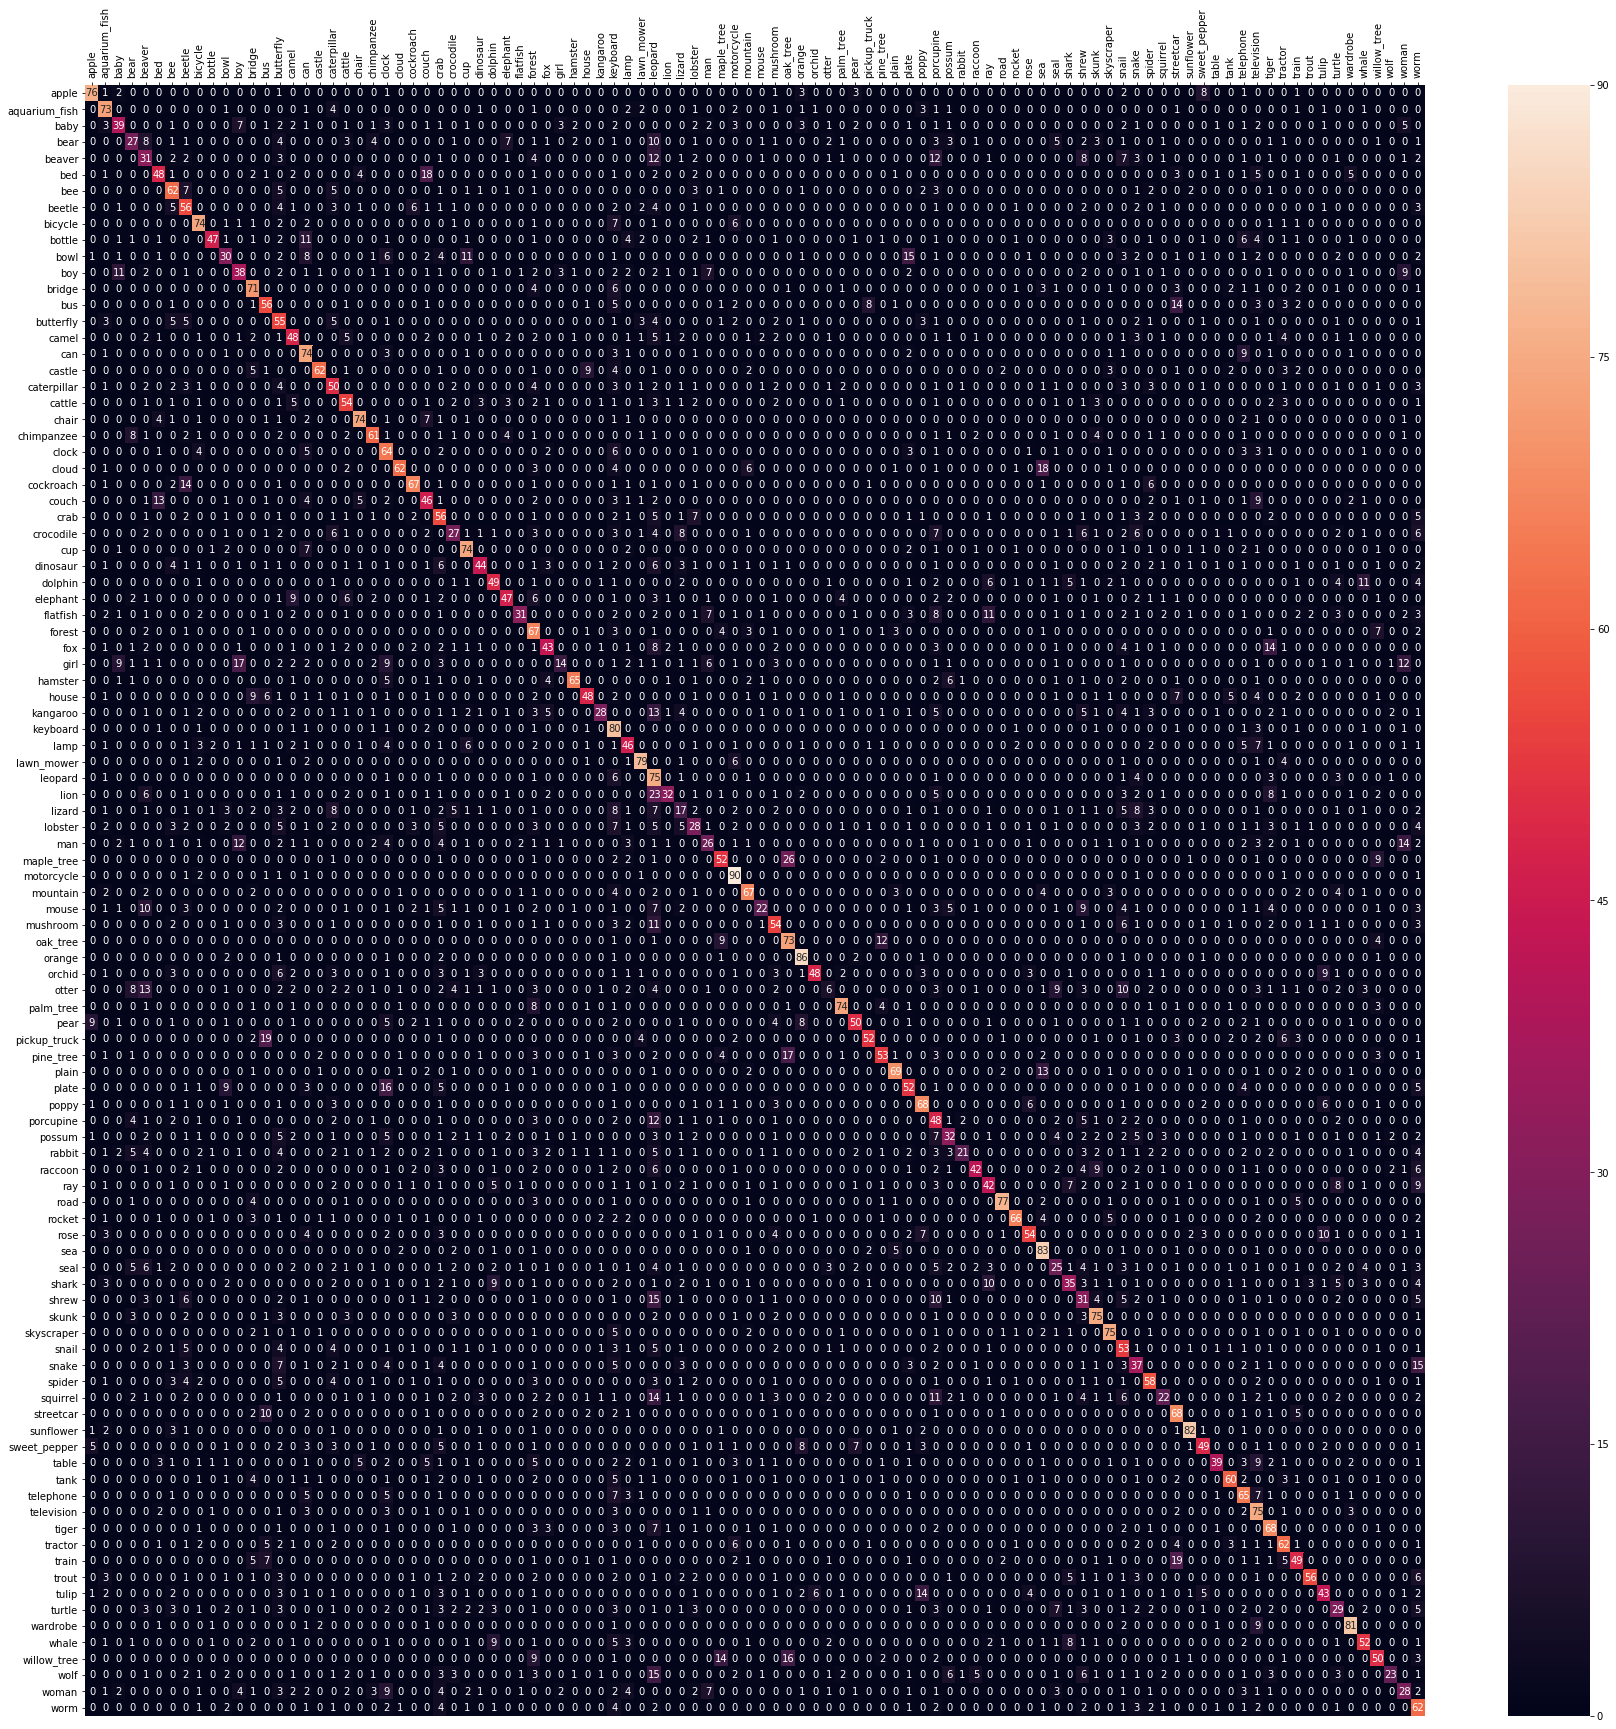

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import itertools


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
df_cm = pd.DataFrame(cm, index = [i for i in CIFAR100_LABELS_LIST],
                  columns = [i for i in CIFAR100_LABELS_LIST])

fig, ax = plt.subplots()
ax.xaxis.tick_top()
fig.set_size_inches((30,30))
sn.heatmap(df_cm,annot=True,ax=ax)



  

Above is the confusion matrix to understand where we went wrong with our model.

 We analyzed this data and downloaded our dataset pictures to our computer to see if a human can also make this mistakes.

In [ ]:
sum=0
for i in range(len(cm)):
  sum+=cm[i][i]
print("Test Accuracy Is : {}".format(sum/len(x_test)))

Test Accuracy Is : 0.5254


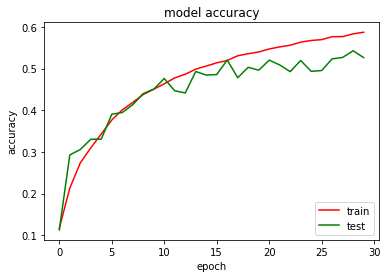

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

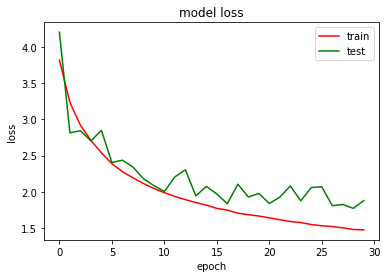

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]-1.5, ax.get_ylim()[1]-1.5

In [ ]:
def setsub(fig,a,b,i,rows,columns,count_):
      img = x_test[i]
      ax = fig.add_subplot(rows, columns, count_)
      ax.annotate(CIFAR100_LABELS_LIST[b[i]],xy=get_axis_limits(ax))
      plt.imshow(img)

def setsubplotes(fig,classification):
  count = 1
  w=10
  h=10
  columns = 10
  rows = 10
  if classification:
     for i in range(100):
       if a[i] == b[i]:
         setsub(fig,a,b,i,rows,columns,count)
         count += 1
       if count == 7:break
  else:
    for i in range(100):
       if a[i] != b[i]:
         setsub(fig,a,b,i,rows,columns,count)
         count += 1
       if count == 7:break

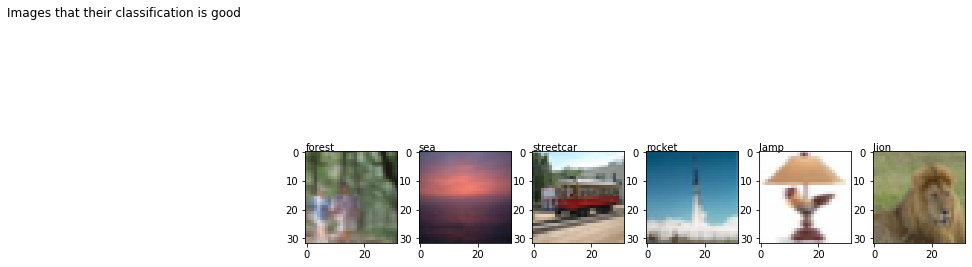

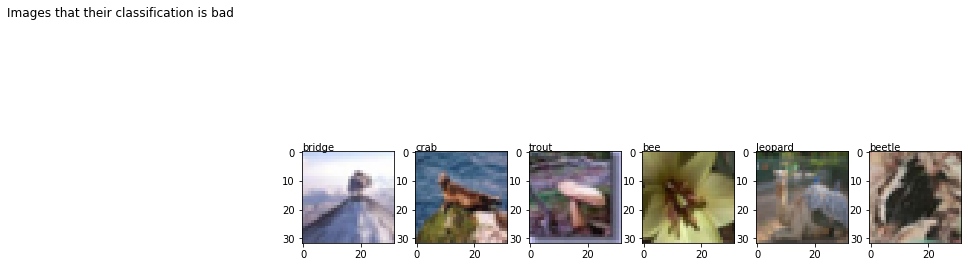

In [ ]:
fig_good=plt.figure(figsize=(20, 20))
fig_good.suptitle('Images that their classification is good',x=0,y=0.98)
setsubplotes(fig_good,True)

fig_bad=plt.figure(figsize=(20, 20))
fig_bad.suptitle('Images that their classification is bad',x=0,y=0.98)
setsubplotes(fig_bad,False)

Our bad classifications showing that the model did mistakes and classified mushroom with trout , bee with flow and leopard with camel. 


## Conclusions : 

* Our model overfits the training data as the test accuracy is much lower than the training. The loss graph is also showing that.

* We can see it's starting to overfit from the 10th epoch.

* If we look in the confusion matrix we can see some missclassified classes that reach lower true positive results per class. 

  In example : crocodile reached 27% true positive classifications which is low so we cannot guarntee a crocodile classification in our model and it will be uncertain prediction.






### Improvments : 
Our model has high variance and we suggest the following improvments : 

* Implement more control over our learning rate by changing it through the epochs of our model and making it more dynamic.
* Add dropout to get more reglurization and decrease overfitting
* Decrease model complexity

<p id="Q2d"></p>

# <u>**Q2 - Improved model**</u>

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.datasets import cifar100
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline 
%tensorflow_version 1.x

Using TensorFlow backend.


In [ ]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

num_of_classes = 100
y_train = to_categorical(y_train, num_of_classes)
y_val = to_categorical(y_val, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)
x_train = x_train.astype('float32') /255.
x_val = x_val.astype('float32') /255.
x_test = x_test.astype('float32') /255.
_, dim1, dim2 , channels = x_train.shape

169009152/169001437 [==============================] - 4s 0us/step


## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

## Building the model

In [ ]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(input_shape=(dim1,dim2,channels),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())


model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(units=100, activation="softmax"))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Adding Learning rate scheduler

In [ ]:
import math
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
	initial_lrate = 0.001
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

lrate = LearningRateScheduler(step_decay)

In [ ]:
opt = Adam(lr=0.001)
from keras import optimizers
# opt = optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

## Training the Model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("cifar_100_improved.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                steps_per_epoch=len(x_train) / 32, epochs=60, callbacks=[checkpoint,early,lrate] ,shuffle=True, verbose=1,validation_data=(x_val,y_val),validation_steps=(len(x_val)/32))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/60
1250/1250 [==============================] - 60s 48ms/step - loss: 4.1471 - acc: 0.0778 - val_loss: 4.0259 - val_acc: 0.1114

Epoch 00001: val_acc improved from -inf to 0.11140, saving model to cifar_100_improved.h5
Epoch 2/60
1250/1250 [==============================] - 55s 44ms/step - loss: 3.5365 - acc: 0.1555 - val_loss: 3.0439 - val_acc: 0.2430

Epoch 00002: val_acc improved from 0.11140 to 0.24300, saving model to cifar_100_improved.h5
Epoch 3/60
1250/1250 [==============================] - 55s 44ms/step - loss: 3.2619 - acc: 0.2026 - val_loss: 3.3565 - val_acc: 0.2185

Epoch 00003: val_acc did not improve from 0.24300
Epoch 4/60
1250/1250 [==============================] - 55s 44ms/step - loss: 3.0701 - acc: 0.2392 - val_loss: 2.6773 - val_acc: 0.3153

Epoch 00004: val_acc improved from 0.24300 to 0.31530, saving model to cifar_100_improved.h5
Epoch 5/60
1250/1250 [========

In [ ]:
  from keras.models import load_model
model = load_model('cifar_100_improved.h5')

## Predictions

In [ ]:
pred = model.predict(x_test,batch_size=32)

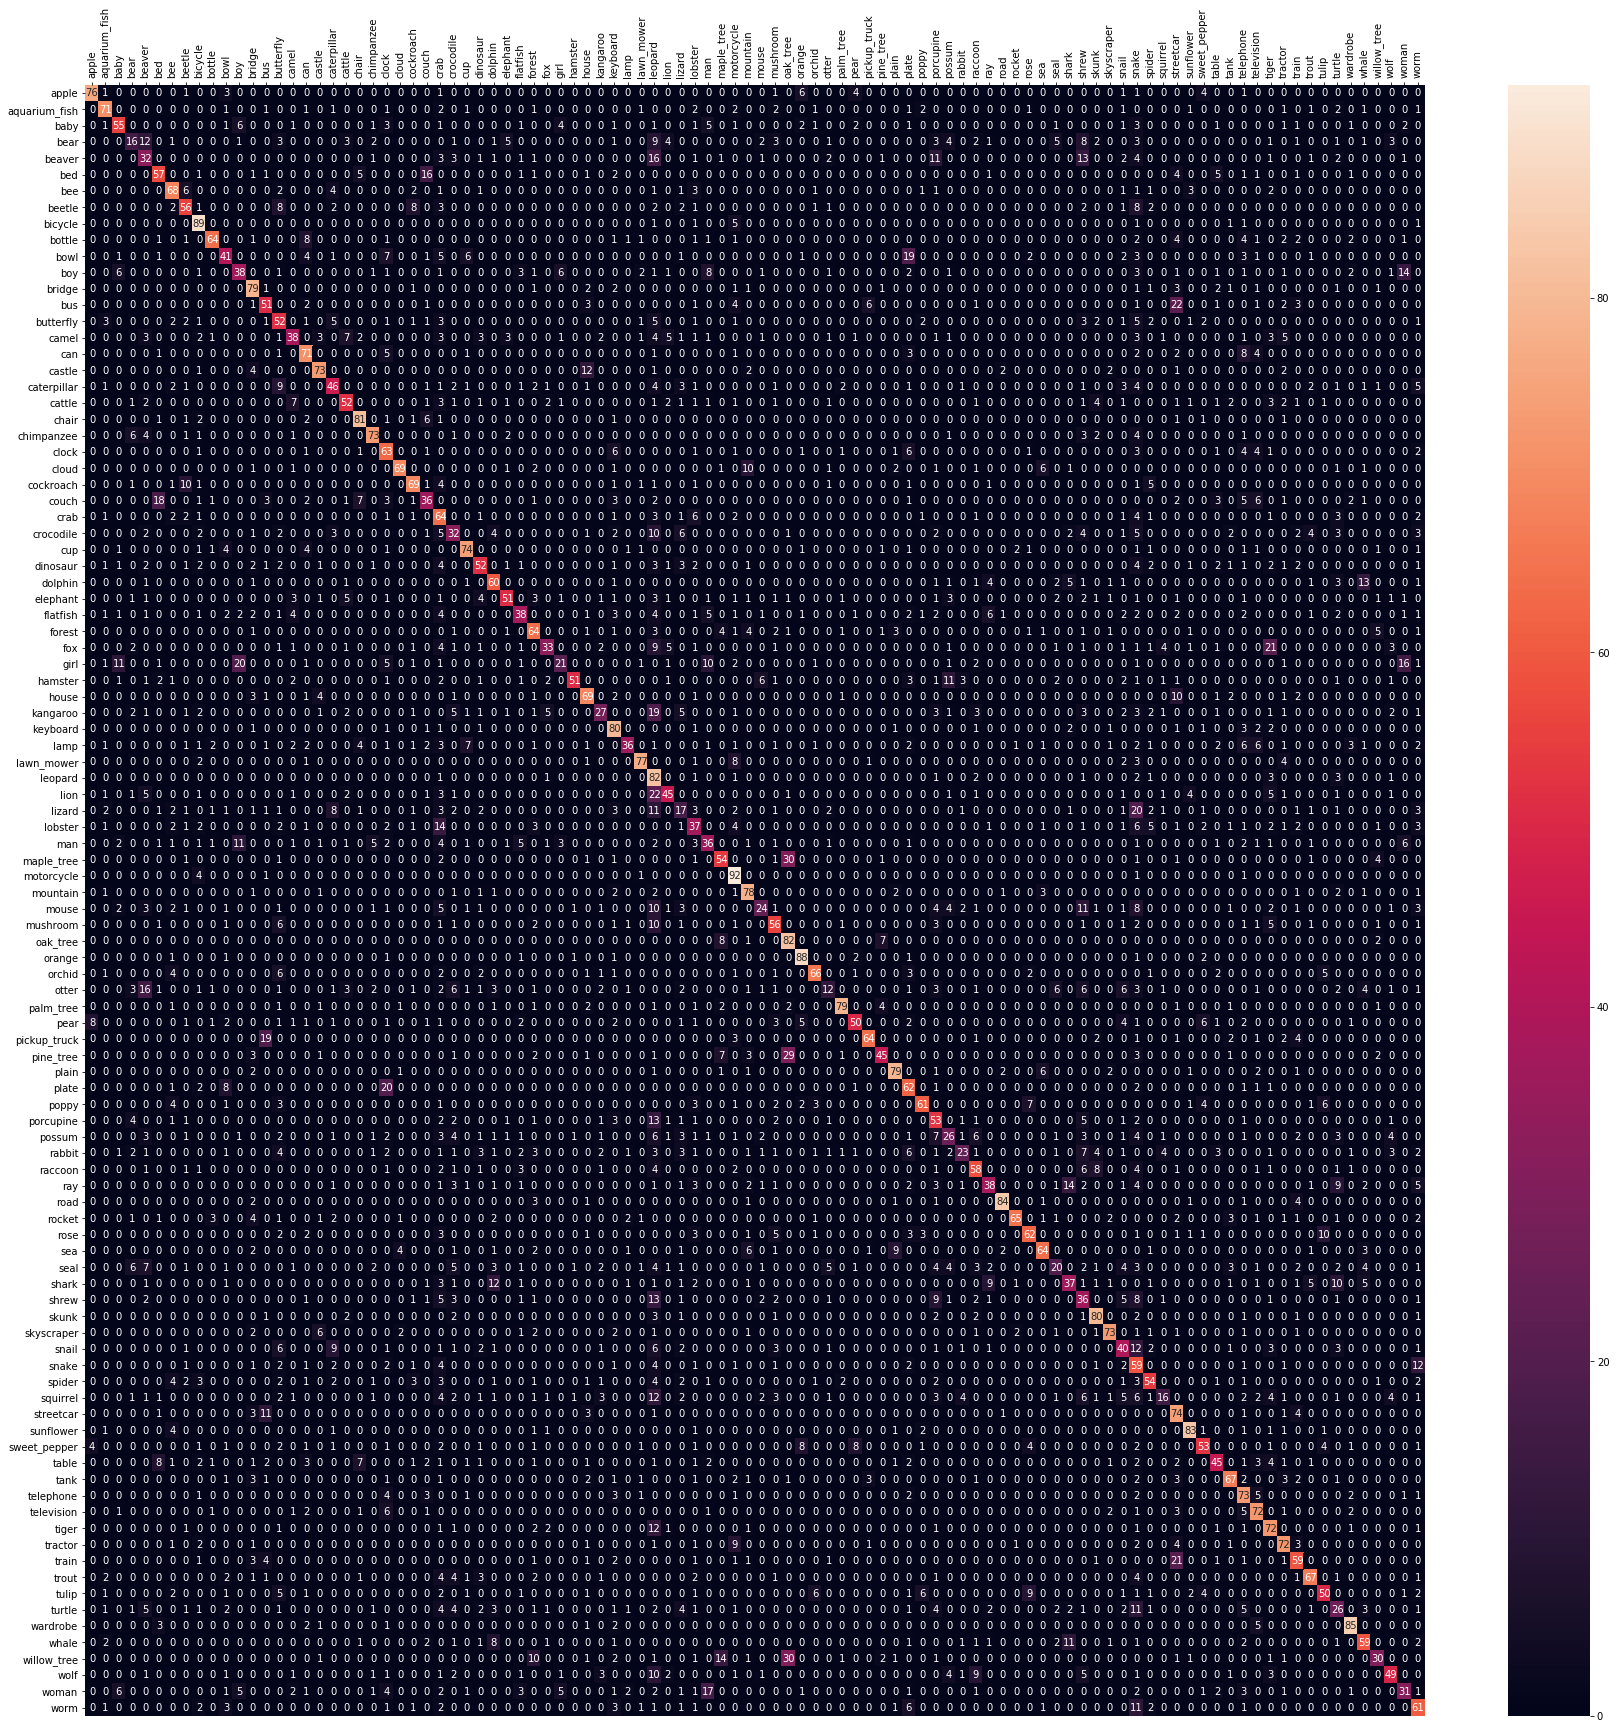

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import itertools


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
df_cm = pd.DataFrame(cm, index = [i for i in CIFAR100_LABELS_LIST],
                  columns = [i for i in CIFAR100_LABELS_LIST])

fig, ax = plt.subplots()
ax.xaxis.tick_top()
fig.set_size_inches((30,30))
sn.heatmap(df_cm,annot=True,ax=ax)



  

In [ ]:
a = np.argmax(y_test, axis = 1)

In [ ]:
b = np.argmax(pred, axis = 1)

In [ ]:
sum=0
for i in range(len(cm)):
  sum+=cm[i][i]
print("Test Accuracy Is : {}".format(sum/len(x_test)))

Test Accuracy Is : 0.557


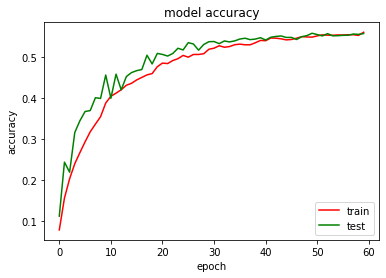

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

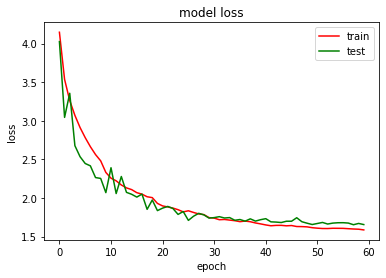

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]-1.5, ax.get_ylim()[1]-1.5

In [ ]:
def setsub(fig,a,b,i,rows,columns,count_):
      img = x_test[i]
      ax = fig.add_subplot(rows, columns, count_)
      ax.annotate(CIFAR100_LABELS_LIST[b[i]],xy=get_axis_limits(ax))
      plt.imshow(img)

def setsubplotes(fig,classification):
  count = 1
  w=10
  h=10
  columns = 10
  rows = 10
  if classification:
     for i in range(100):
       if a[i] == b[i]:
         setsub(fig,a,b,i,rows,columns,count)
         count += 1
       if count == 7:break
  else:
    for i in range(100):
       if a[i] != b[i]:
         setsub(fig,a,b,i,rows,columns,count)
         count += 1
       if count == 7:break

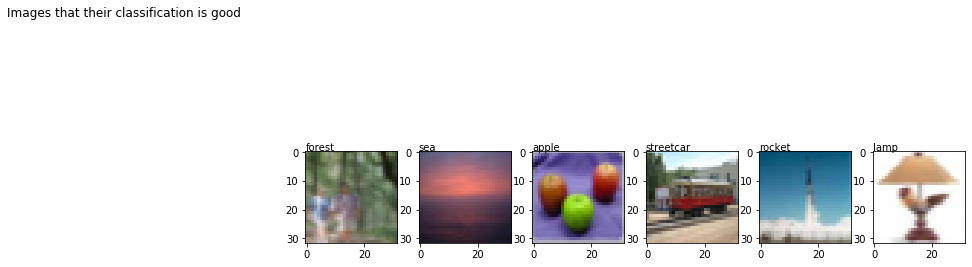

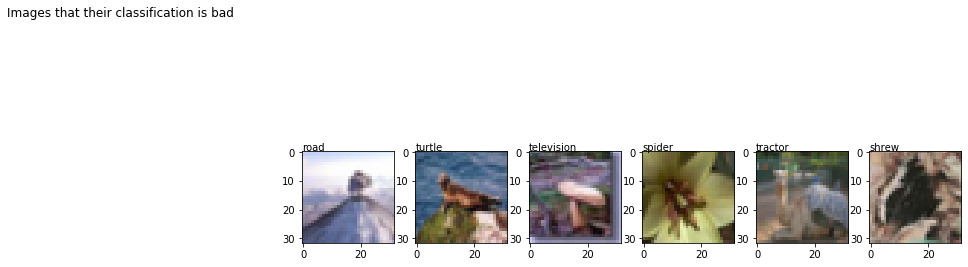

In [ ]:
fig_good=plt.figure(figsize=(20, 20))
fig_good.suptitle('Images that their classification is good',x=0,y=0.98)
setsubplotes(fig_good,True)

fig_bad=plt.figure(figsize=(20, 20))
fig_bad.suptitle('Images that their classification is bad',x=0,y=0.98)
setsubplotes(fig_bad,False)

## Conclusions : 

* Our model no longer overfits the training data and looks well fitted. 

  the graphs of the accuracy per epoch and the loss per epoch shows almost simillar results for the training and the test

* We compared the confusion matrix from our base model to this model and we improved many classes that classified wrong and since the model is more reliable we can count more on the results than our previous model. 


<p id="Q3a"></p>

# <u>**Q3 - Transfer learning**</u>

In [1]:
import numpy as np
from keras.layers import Input
from keras.utils import np_utils
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100

Using TensorFlow backend.


In [ ]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

num_of_classes = 100
y_train = to_categorical(y_train, num_of_classes)
y_val = to_categorical(y_val, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)
x_train = x_train.astype('float32') /255.
x_val = x_val.astype('float32') /255.
x_test = x_test.astype('float32') /255.
_, dim1, dim2 , channels = x_train.shape


169009152/169001437 [==============================] - 6s 0us/step


## Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)

In [5]:
input_tensor = Input(shape=(32, 32, 3))

## Learning rate Scheduler

In [ ]:
import math
from keras.callbacks import LearningRateScheduler

def step_decay(epoch):
	initial_lrate = 0.001
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

lrate = LearningRateScheduler(step_decay)

In [ ]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 12:
        lr *= 1e-3
    elif epoch > 8:
        lr *= 1e-2
    elif epoch > 5:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

We chose to use Xception model. 

We set `include_top=False` to remove the last layers and change the input of the model.

We Flattned the output of Xception model and added dense layer of our own to the model and changed the output to 100 instead of 1000.

Also using learning rate scheduler to get more control of our model.

In [8]:
from keras.applications import MobileNet,MobileNetV2,NASNetLarge,ResNet50,Xception
from keras.layers import Input
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Conv2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau


input_tensor = Input(shape=(32, 32, 3))
base_model = Xception(input_tensor=input_tensor, include_top=False)

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
lr_scheduler = LearningRateScheduler(lr_schedule)


model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])











83689472/83683744 [==============================] - 3s 0us/step




## Model Layers

In [9]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 15, 15, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 15, 15, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 15, 15, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [10]:
hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                steps_per_epoch=len(x_train) / 32, epochs=20, callbacks=[lr_scheduler] ,shuffle=True, verbose=1,validation_data=(x_val,y_val),validation_steps=(len(x_val)/32))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
Learning rate:  0.001
1250/1250 [==============================] - 125s 100ms/step - loss: 3.8800 - acc: 0.0831 - val_loss: 3.2063 - val_acc: 0.1715
Epoch 2/20
Learning rate:  0.001
1250/1250 [==============================] - 113s 91ms/step - loss: 2.8713 - acc: 0.2487 - val_loss: 2.5546 - val_acc: 0.3205
Epoch 3/20
Learning rate:  0.001
1250/1250 [==============================] - 113s 91ms/step - loss: 2.4171 - acc: 0.3530 - val_loss: 2.4633 - val_acc: 0.3693
Epoch 4/20
Learning rate:  0.001
1250/1250 [==============================] - 113s 91ms/step - loss: 2.1747 - acc: 0.4138 - val_loss: 2.1164 - val_acc: 0.4306
Epoch 5/20
Learning rate:  0.001
1250/1250 [==============================] - 114s 91ms/step - loss: 1.9942 - acc: 0.4583 - val_loss: 2.1327 - val_acc: 0.4581
Epoch 6/20
Learning rate:  0.001
1250/1250 [==============================] - 113s 91ms/step - loss: 1.8531 

## Pretrained Model Prediction

In [ ]:
pred = model.predict(x_test,batch_size=32)

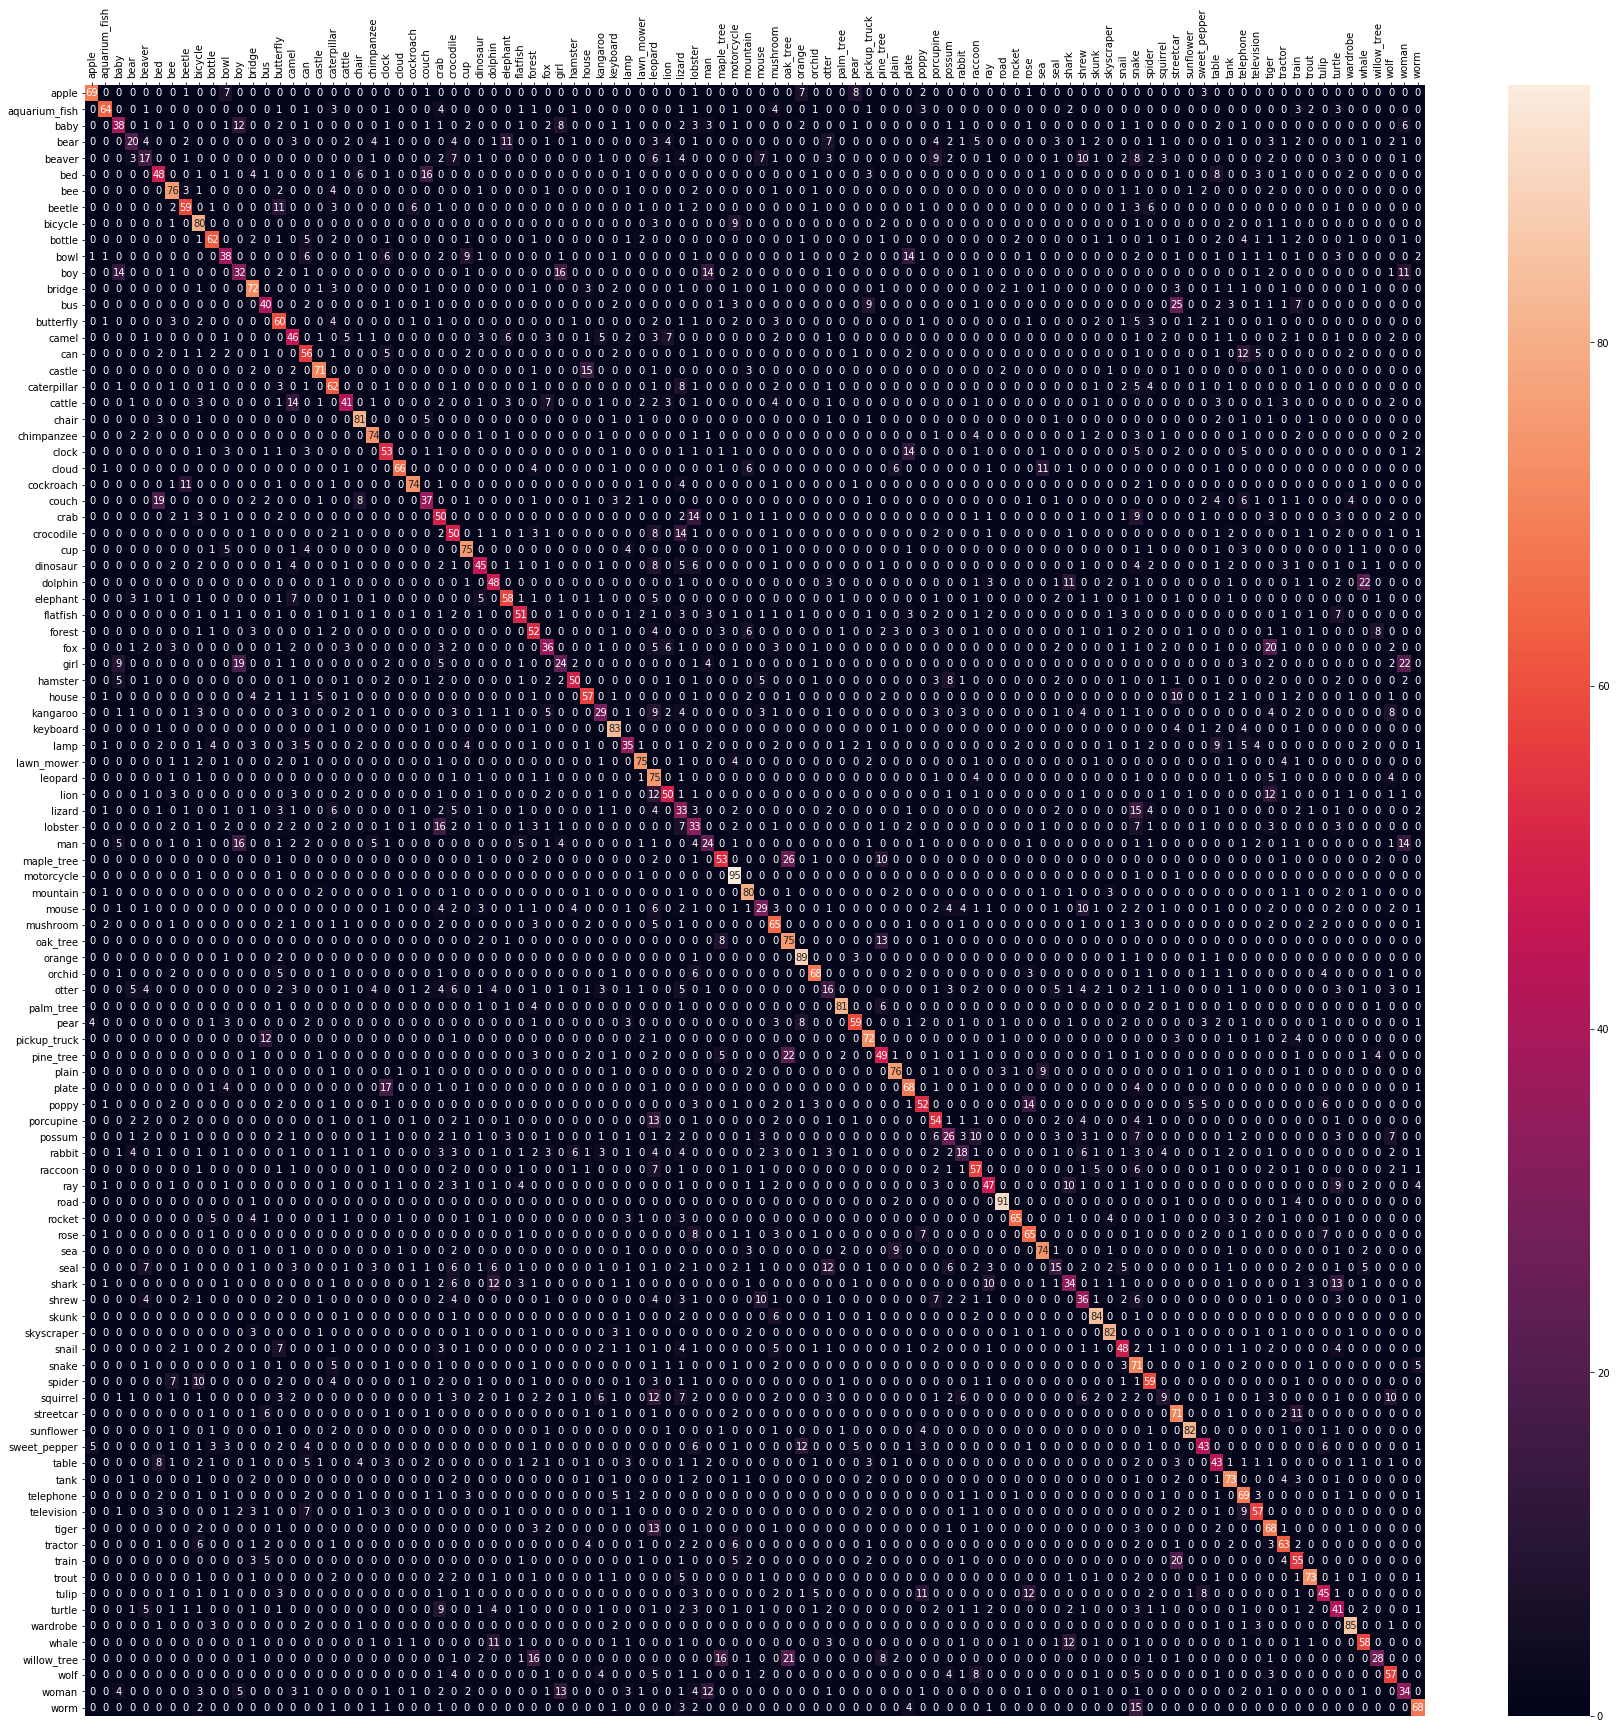

In [12]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import itertools


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(y_test, axis = 1),np.argmax(pred, axis = 1))
df_cm = pd.DataFrame(cm, index = [i for i in CIFAR100_LABELS_LIST],
                  columns = [i for i in CIFAR100_LABELS_LIST])

fig, ax = plt.subplots()
ax.xaxis.tick_top()
fig.set_size_inches((30,30))
sn.heatmap(df_cm,annot=True,ax=ax)



  

In [13]:
sum=0
for i in range(len(cm)):
  sum+=cm[i][i]
print("Test Accuracy Is : {}".format(sum/len(x_test)))

Test Accuracy Is : 0.5544


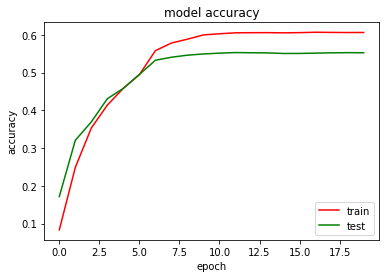

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['acc'], color='red')
ax.plot(hist.history['val_acc'], color ='green')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

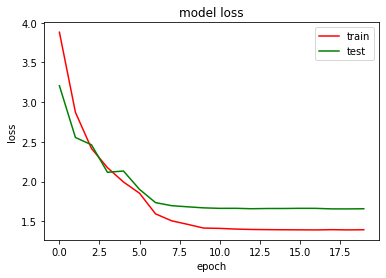

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [16]:
a = np.argmax(y_test, axis = 1)
a

array([49, 33, 72, ..., 51, 42, 70])

In [17]:
b = np.argmax(pred, axis = 1)
b

array([44, 88, 44, ..., 51, 42, 45])

In [ ]:
def get_axis_limits(ax, scale=.9):
    return ax.get_xlim()[1]-1.5, ax.get_ylim()[1]-1.5

In [ ]:
def setsub(fig,a,b,i,rows,columns,count_):
      img = x_test[i]
      ax = fig.add_subplot(rows, columns, count_)
      ax.annotate(CIFAR100_LABELS_LIST[b[i]],xy=get_axis_limits(ax))
      plt.imshow(img)

def setsubplotes(fig,classification):
  count = 1
  w=10
  h=10
  columns = 10
  rows = 10
  if classification:
     for i in range(100):
       if a[i] == b[i]:
         setsub(fig,a,b,i,rows,columns,count)
         count += 1
       if count == 7:break
  else:
    for i in range(100):
       if a[i] != b[i]:
         setsub(fig,a,b,i,rows,columns,count)
         count += 1
       if count == 7:break

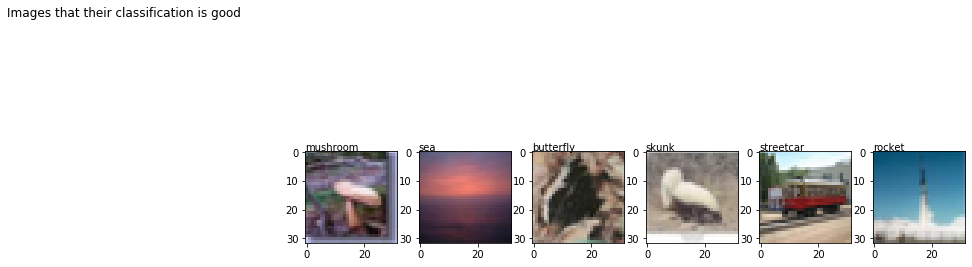

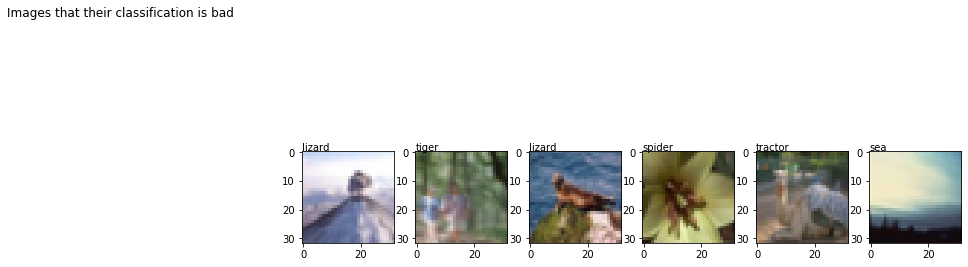

In [20]:
fig_good=plt.figure(figsize=(20, 20))
fig_good.suptitle('Images that their classification is good',x=0,y=0.98)
setsubplotes(fig_good,True)

fig_bad=plt.figure(figsize=(20, 20))
fig_bad.suptitle('Images that their classification is bad',x=0,y=0.98)
setsubplotes(fig_bad,False)

## Conclusions : 

* We reached 55% accuracy on the test and 60% on the training set.

* The pretrained model didn't fit well as our improved model from     the previous question.
  
*  Xception model is built for 224X224 images and ours was 32x32. 

  This could lead to the results we got.


<p id="Q3d"></p>

#  - **Feature Extraction**

Here we use our pretrained model to extract features from it. 
We build the train and the test features to insert it to a random forest classifier.

In [27]:
extraction_model = Model(input=model.input, output=model.get_layer("dense_1").output)

features = []
for sample in x_train: 
 features.append(extraction_model.predict(np.expand_dims(sample, axis=0)))

test_features = []
for test_sample in x_test: 
 test_features.append(extraction_model.predict(np.expand_dims(test_sample, axis=0)))

train = np.squeeze(np.asarray(features))
test = np.squeeze(np.asarray(test_features))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


Below is the classification with Random Forest classifier.

We achieved 38.08% prediction  on the test with this model


In [36]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=35, random_state=0)
clf.fit(train,y_train)
classical_model_results=clf.predict(test)



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Conclusions : 

* The pretrained Xception model reached better accuracy on the test than the random forest classifier.

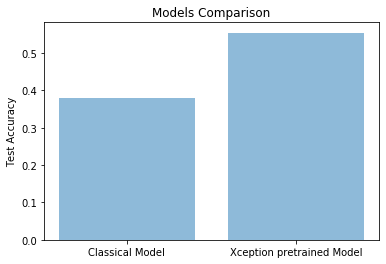

In [37]:
objects = ('Classical Model', 'Xception pretrained Model')
y_pos = np.arange(len(objects))
performance = [accuracy_score(y_test,classical_model_results), sum/len(x_test)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Test Accuracy')
plt.title('Models Comparison')

plt.show()